In [97]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
from astropy.io import fits
from photutils.isophote import Ellipse
from photutils.isophote import EllipseGeometry
import numpy as np
from astropy.cosmology import WMAP9 as cosmo

In [118]:
#Abre o mapa de fluxo
data = fits.open('ngc4579.mom0.fits')
fluxmap = data[0].data

In [119]:
#Abre o mapa de velocidades/frequencias
data2 = fits.open('ngc4579.mom1.fits')
velmap= data2[0].data

In [120]:
#acha o centro da galáxia usando a isophota:
#g = EllipseGeometry(40,45,20,0.345,2)
#centro = g.find_center(fluxmap) 
ellipse = Ellipse(fluxmap)#fita varias ellipses aos dados
isolist = ellipse.fit_image()  
iso=isolist.get_closest(13.)
centrox=iso.x0
centroy=iso.y0
pa=iso.pa

In [121]:
#Cria curva de rotação a partir do eixo de maior gradiente de velocidade:
x1 = np.linspace(0,66,100)#define vetor com as coordenadas x da imagem do mapa de velocidades
reta = np.tan(2)*x1+(-(centrox)*np.tan(2) + centroy)#eixo de rotação(angulo obtido(isolist.pa))
newx = np.round(x1) #transforma as coordenadas em inteiro
newreta = np.round(reta)
cortereta=[]
cortreta = []
for i in range(len(x1)):
    cortreta.append((x1[i],reta[i]))
    for j in range(len(cortreta)):
        if cortreta[j][1]>=0 and cortreta[j][1]<(len(velmap[:,1])):
            cortereta.append((cortreta[i][0],cortreta[i][1]))
cortereta=np.asarray(cortereta)        

In [122]:
#variar reta em varios angulos para achar o gradiente de velocidade
ret = []
distanc = np.arange(-100,100,2)
gradiente = []
thet = np.linspace(1,180,100)
theta = np.round(thet)
maxgrad = 0
velocmax = []
coordreta = []
velofinal = []
x0=centrox
y0= centroy
for i in theta:
    xx = x0 + distanc*np.cos(i)
    yy = y0 + distanc*np.sin(i)
        
   # ret = np.tan(np.radians(i))*x1+(-42*np.tan(np.radians(i)) + 47)
    #print(ret)
    #wait = input("press enter to continue") 
    matriz=[]#cria uma matriz com as coordenadas x e y da reta
    for j in range(len(distanc)):
        matriz.append([xx[j],yy[j]])
        #print(matriz)
        #wait = input("press enter to continue") 

        #print(t)
        #wait = input("press enter to continue") 
    velo = [0] * 100 #Cria vetor de velocidade nulo de tamanho 100 
    for k in range(100):
       # print(t[k][1],t[k][0])
        if matriz[k][1] >= 0 and matriz[k][1]<=(len(velmap[:,1])) and matriz [k][0]>=0 and matriz[k][0]<(len(velmap[:,1])):
            velocidade = velmap[int(matriz[k][1]),int(matriz[k][0])]
            if velocidade > -1000:
                velo[k] = velmap[int(matriz[k][1]), int(matriz[k][0])]
            #print(veloc[k])
           # wait = input("press enter to continue")    
    maximo = max(velo) #pega os pontos máximos e mínimos da velodidade
    minimo = min(velo)
    imax = [k for k, y in enumerate(velo) if y == maximo]#pega os índices onde a velocidade é máxima e mínima
    imax = max(imax)
    imin = [k for k, y in enumerate(velo) if y == minimo]
    imin = min(imin)
    dist = (np.sqrt((matriz[imax][0] - matriz[imin][0])**2 + (matriz[imax][1] - matriz[imin][1])**2)) #distância entre os pontos de máximo e mínimo
    grad = (maximo - minimo) #/dist gradiente de velocidade 
#Loop para pegar o ângulo cuja reta tem o maior gradiente:   
    if grad > maxgrad: 
        maxgrad = grad 
        retfinal = matriz
        thetafinal = i

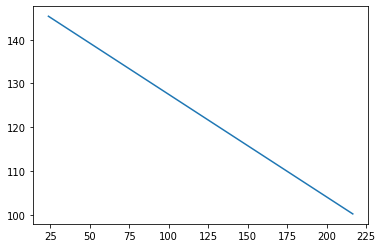

In [123]:
retafinal = np.asarray(retfinal)
velofinal = []
coordreta = []#coordenadas da reta final
for i in range(len(retafinal)):#Loop para extrair a velocidade da reta de maior gradiente
    if retafinal[i][1] >= 0 and retafinal[i][1]<=(len(velmap[:,1])):
        coordreta.append([retafinal[i][0],retafinal[i][1]])
        velocidade = velmap[int(retafinal[i][1]),int(retafinal[i][0])]
        if velocidade > -1000:
            velofinal.append((retafinal[i][0],retafinal[i][1], velmap[int(retafinal[i][1]), int(retafinal[i][0])]))
    #velocfinal.append(velmap[int(test[i][1]), int(test[i][0])])     
coordfinal= np.asarray(coordreta)#coordenadas da reta de maior gradiente, que vão entrar como índice para extrair a velocidade
velocfinal = np.asarray(velofinal)#array com a velocidade ao longo da reta de maior gradiente
plt.plot(retafinal[:,0],retafinal[:,1])
plt.show()

In [124]:
#Calcula distância entre o centro da galáxia e cada ponto da reta:  
dist = []    
for i in range(len(velocfinal)):
    dist.append((velocfinal[i][1],((centroy - velocfinal[i][1])/(np.abs(centroy - velocfinal[i][1]))*(np.sqrt((velocfinal[i][0] - centrox)**2 + (velocfinal[i][1] - centroy)**2)))))
distancia = np.asarray(dist)
#Loop para calcular o erro da velocidade ao longo da reta de maior grad
errograd = []
for i in range(len(retafinal)):
    if retafinal[i][1] >= 0 and retafinal[i][1]<=(len(velmap[:,1])):
        er = np.asarray(err[int(retafinal[i][1]),int(retafinal[i][0])])
        if er > -1000:
            errograd.append((retafinal[i][1], err[int(retafinal[i][1]), int(retafinal[i][0])]))
Errograd = np.asarray(errograd)#array com os valores do erro da velocidade

/home/oliviernatanael/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


NameError: name 'err' is not defined

In [ ]:
#Cria curva de rotação a partir do semi eixo maior da isophota:

'''ellipse = Ellipse(fluxmap,g)#fita varias ellipses aos dados
smas =np.linspace(0,40,2) 
for sma in smas:
    isolist = ellipse.fit_image()
    iso = isolist.get_closest(sma)#fita varias elipses a imagem com sma medio =20
    x, y, = iso.sampled_coordinates()'''
    
isophote=isolist[-1]
 
iso = isolist.get_closest(21.)#pega a elipse com semi-major axis proximo do pedido
x, y, = iso.sampled_coordinates() #pega as coordenadas da elipse
sma = iso.sma #semi major axis
#Loop para extrair a velocidade ao longo do sma da isophota
#t=[]#cria uma matriz com as coordenadas x e y da reta
#for i in range(len(x1)):
 #   t.append([newx[i],newreta[i]])
#veloc =[]
#/for i in range(len(t)):
    #if t[i][1] >= 0 and t[i][1]<250:
   #     velocidade = velmap[int(t[i][1]),int(t[i][0])]
  #      if velocidade > -1000:
 #           veloc.append((t[i][1], velmap[int(t[i][1]), int(t[i][0])],t[i][0]))    
#velocid = np.array(veloc)#array de velocidade ao longo do sma

In [ ]:
sma

In [ ]:
#Transformando a distância em pixels para distância física
#1º transforma de pixel para tamanho angular:
c = 300000#km/s
Ho = 70 #Km/s Mpc
Om = 0.3
z = 0.137
#R = 0.44*10**3#pc
#da = c/Ho * 2/((Om)**2*(1+z)**2)*(Om*z + (Om - z)*(np.sqrt(1+Om*z) - 1))
#dl = (1 +z)*R
#da = dl/(1+z)**2
da = cosmo.angular_diameter_distance(z)#distancia Mpc
da = np.array(da)
#2º transforma o tamanho angular para distancia física
#1 arco-segundo = 4.848137E-6 radianos
#50mas = 2.42*10**(-7)rad
R = da*2.42*10**(-7)*10**6 #diametro de cada pixel pc

#distfisica = R*intersec #distancia real em pc

xnew = (1/np.tan(2))*reta + (42 -47/(np.tan(2)))
#intersec = np.asarray([line for line in reta if line in y])#ponto de interseção entre a reta e a elipse

#Se precisar salvar o arquivo:
'''#t = np.asarray([newx,newy])
c1 = fits.Column(name='x', array=np.array(newx), format='K')
c2 = fits.Column(name='y', array=np.array(newy), format='K')
t = fits.BinTableHDU.from_columns([c1, c2])
t.writeto('table2.fits') #para salvar as coordenadas em um arquivo
#t.write('table1.fits', format='fits')
data1 = fits.open("/home/amanda/table1.fits") #abre as coordenadas em fits
coord = data1[1].data
'''

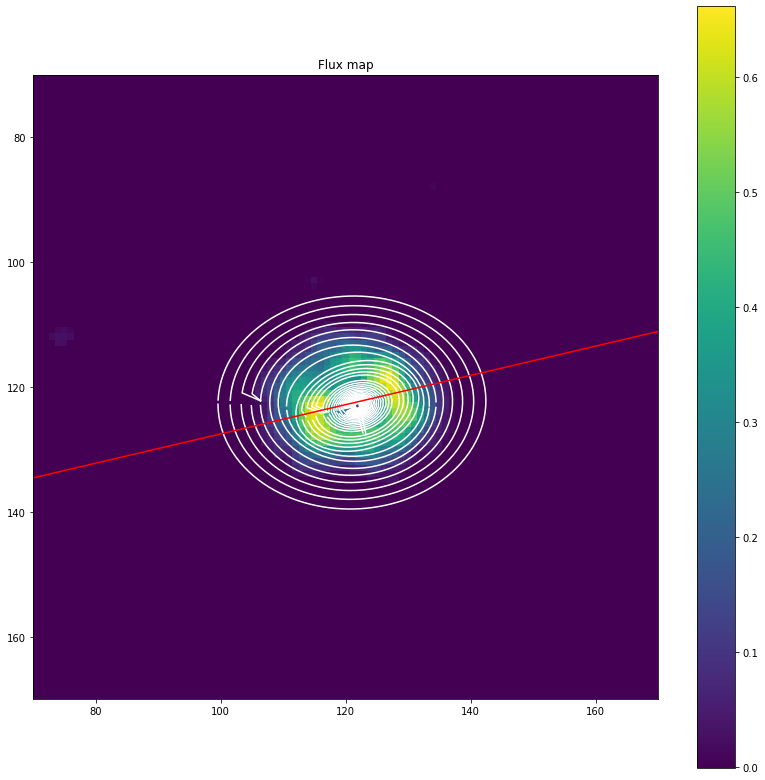

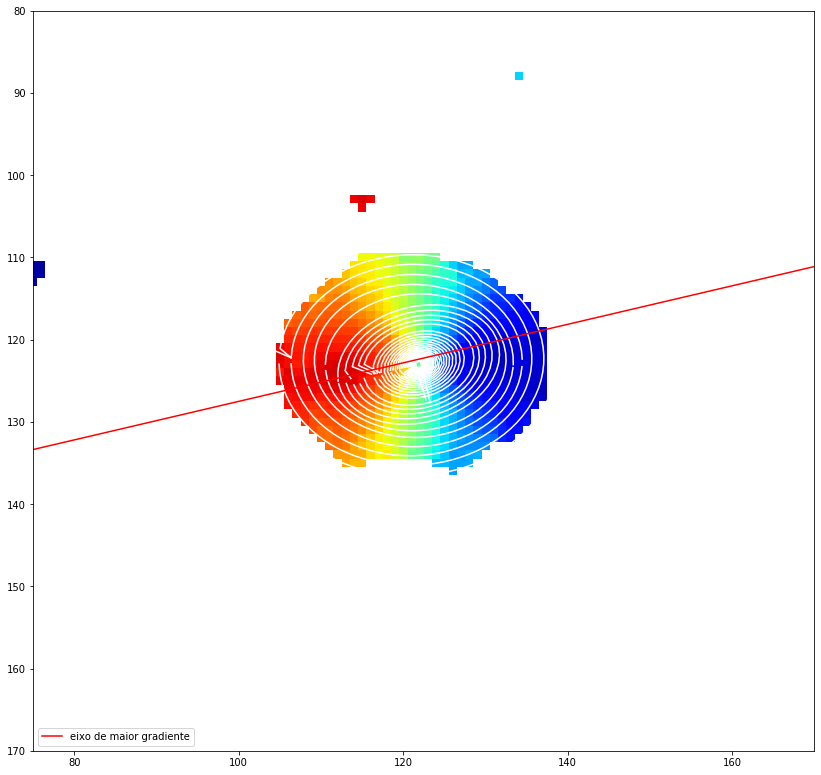

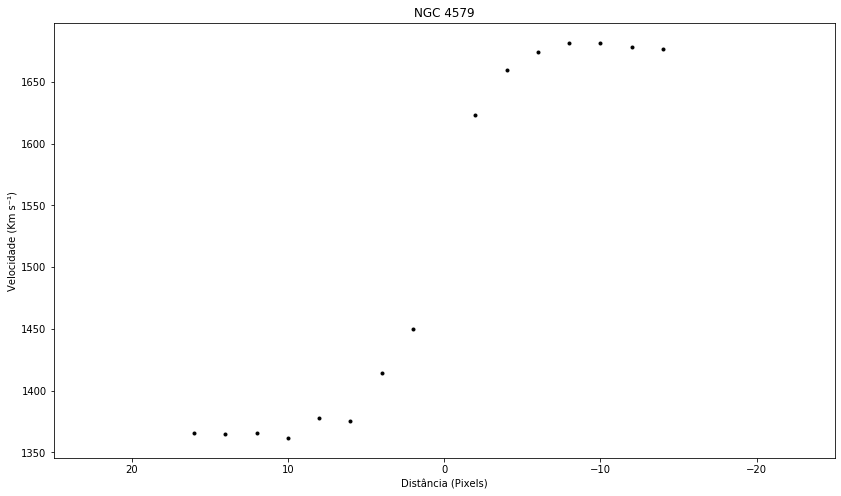

In [125]:
#plot
plt.figure(figsize=(14,14))
plt.imshow(fluxmap)
plt.title("Flux map")
plt.xlim(70,170)
plt.ylim(170,70)
plt.plot((isophote.sample.values[0]/np.pi*180., isophote.sample.values[2]))
smas = isolist.sma
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    plt.plot(x,y,color='white')
plt.plot(coordfinal[:,0],coordfinal[:,1], color='red')
plt.colorbar()
plt.show()

plt.figure(figsize=(14,14))
plt.imshow(velmap,cmap= 'jet')
smas = isolist.sma

for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    plt.plot(x,y,color='white')
plt.plot(coordfinal[:,0],coordfinal[:,1], color='red',label = "eixo de maior gradiente")
#plt.plot(x1[20:91],reta[20:91], color='blue' , label="semi eixo maior da isophota para sma=20")
plt.legend(loc='lower left')
plt.xlim(75,170)
plt.ylim(170,80)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(distancia[:,1],velocfinal[:,2],'k.')
plt.xlim(25,-25)
#plt.ylim(-400,120)
plt.xlabel('Distância (Pixels)')
plt.ylabel('Velocidade (Km s⁻¹)')
plt.title('NGC 4579')
plt.show()